The problem is computationally difficult(NP-hard); however, there are heuristic algorithm that are commonly employed and converge quickly to a local optimum.

These are usually similar to the expectation-maximization algorithm for mixtures of Gaussian distributions via an iterative refinement approach employed by both k-means and Gaussian Mixture Modeling. Additionally, they both use cluster centers to model the data; however, k-means clustering tends to find clusters of comparable spatial extent, while the expectation-maximization mechanism allows clusters to have different shapes.


Given a set of observations (x1, x2, …, xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, …, Sk} so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). Formally, the objective is to find:

\begin{equation*}
argmin \sum_{i=1}^{k}\sum_{x in S_i}\norm [2]{x - u_i}^2
\end{equation*}




As it is a heuristic algorithm, there is no guarantee that it will converge to the global optimum, and the result may depend on the initial clusters. As the algorithm is usually very fast, it is common to run it multiple times with different starting conditions. However, in the worst case, k-means can be very slow to converge: in particular it has been shown that there exist certain point sets, even in 2 dimensions, on which k-means takes exponential time, that is 2Ω(n), to converge.[12] These point sets do not seem to arise in practice: this is corroborated by the fact that the smoothed running time of k-means is polynomial.[13]

The "assignment" step is also referred to as expectation step, the "update step" as maximization step, making this algorithm a variant of the generalized expectation-maximization algorithm.

If k and d (the dimension) are fixed, the problem can be exactly solved in time $${\displaystyle O(n^{dk+1})}$$, where n is the number of entities to be clustered[19]
Thus, a variety of heuristic algorithms such as Lloyd's algorithm given above are generally used.

The running time of Lloyd's algorithm (and most variants) is O(nkdi),[20][21] where n is the number of d-dimensional vectors, k the number of clusters and i the number of iterations needed until convergence. 

Lloyd's algorithm is the standard approach for this problem, However, it spends a lot of processing time computing the distances between each of the k cluster centers and the n data points. Since points usually stay in the same clusters after a few iterations, much of this work is unnecessary, making the naive implementation very inefficient. Some implementations use caching and the triangle inequality in order to create bounds and accelerate Lloyd's algorithm.

Three key features of k-means which make it efficient are often regarded as its biggest drawbacks:

1. Euclidean distance is used as a metric and variance is used as a measure of cluster scatter. So it tends to create equal size clusters. while The Gaussian models used by the Expectation-maximization algorithm (which can be seen as a generalization of k-means) are more flexible here by having both variances and covariances. The EM result is thus able to accommodate clusters of variable size much better than k-means as well as correlated clusters (not in this example).and since it depends on euclidean distance, it dosen't apply to non-numerical data. Since it depends on euclidean distance, it's not a good metric in high dimensions


[O]ur intuitions, which come from a three-dimensional world, often do not apply in high-dimensional ones. In high dimensions, most of the mass of a multivariate Gaussian distribution is not near the mean, but in an increasingly distant “shell” around it; and most of the volume of a high-dimensional orange is in the skin, not the pulp. If a constant number of examples is distributed uniformly in a high-dimensional hypercube, beyond some dimensionality most examples are closer to a face of the hypercube than to their nearest neighbor. And if we approximate a hypersphere by inscribing it in a hypercube,
. It is the same situation happened in Nearest Neighbor. How to solve it?

first, check the effective dimensions, do a PCA and see how the eigenvalue drops. 
second, Thus, for a given problem with a fixed (high) value for the dimensionality d, it may be preferable to use lower values of k. This means that the L1 distance metric (Manhattan distance metric) is the most preferable for high dimensional applications, followed by the Euclidean metric (L2). ...

It's like the kNN balls are too sparse to be helpful at probing a smooth hyperplane. With higher dimensions they feel increasingly more lonely.

On the other hand, methods like SVM have a global view and do much better.

2. euclidean distance defined similairy has assumption that clusters are spatially grouped or spherical, iid guassian with same variance. it has similar variance at all dimensions

3. number of clusters k is an input, cross validation to check reasonable right k is important.

4. convergence to a local minimum may produce counterintuitive results

5. no prior informatoin, bad for unbalanced data

6. it is also sensetive to scale, unit measurement. Sometimes, non-linear scaling or transformation might also need to be applied. 





K-means other application

Relationship with other ML algorithm

1. Gaussian mixture model and EM algorithm

the inherint assumption of Kmeans is that cluster is a sperical distributed. in reality, gaussian distribution is more common.

In kmeans, the prior distribution assumption is that all cluster has the similar number of samples

Kmeans use euclidean distance to measure the similarity, but in GMM, it is measured using posterior probability, covariance matrix can allow us to give priority to different dimension


2. PCA



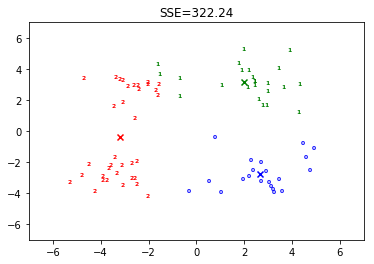

In [2]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



class KMeansClassifier():
	"this is a k-means classifier"
	def __init__(self, k = 3, initCent = 'random', max_iter = 500):
		self._k = k
		self._initCent = initCent
		self._max_iter = max_iter
		self._clusterAssment = None
		self._labels = None
		self._sse = None

	def _calEDist(self, arrA, arrB):
		return np.math.sqrt(sum(np.power(arrA - arrB, 2)))

	def _calMDist(self, arrA, arrB):
		return sum(np.abs(arrA - arrB))

	def _randCent(self, data_X, k):
		"""
		output: k*m matrix of random centroid
		"""
		m = data_X.shape[1]
		centroids = np.empty((k, m))
		for j in range(m):
			minJ = min(data_X[:,j])
			rangeJ = float(max(data_X[:, j] - minJ))
			centroids[:, j] = (minJ + rangeJ*np.random.rand(k, 1)).flatten()
		return centroids

	def loadDataset(self, infile):
		df = []
		fileIn = open(infile)  
		for line in fileIn.readlines():  
			lineArr = line.strip().split()  
			df.append([float(lineArr[0]), float(lineArr[1])])
		df = pd.DataFrame(df)
		return np.array(df).astype(np.float)

	def fit(self, data_X):
		"""
		input n*m matrix
		"""
		if not isinstance(data_X, np.ndarray) or isinstance(data_X, np.matrixlib.defmatrix.matrix):
			try:
				data_X = np.asarray(data_X)
			except:
				raise TypeError("numpy.ndarray resuired for data_X")

		n = data_X.shape[0]
		self._clusterAssment = np.zeros((n, 2))
		if self._initCent == 'random':
			self._centroids = self._randCent(data_X, self._k)

		clusterChanged = True
		for _ in range(self._max_iter):
			clusterChanged = False
			# loop over each data point
			for i in range(n):
				minDist = np.inf
				minIndex = -1
				for j in range(self._k):
					# loop over each centroid
					arrA = self._centroids[j,:]
					arrB = data_X[i,:]
					distJI = self._calEDist(arrA, arrB)
					if distJI < minDist:
						minDist = distJI
						minIndex = j
				if self._clusterAssment[i, 0] != minIndex or self._clusterAssment[i, 1] > minDist**2:
					clusterChanged = True
					self._clusterAssment[i, :] = minIndex, minDist**2
			if not clusterChanged:
				break
			for i in range(self._k):
				index_all = self._clusterAssment[:, 0]
				value = np.nonzero(index_all == i)
				ptsInClust = data_X[value[0]]
				self._centroids[i,:] = np.mean(ptsInClust, axis = 0)

		self._labels = self._clusterAssment[: , 0]
		self._sse = sum(self._clusterAssment[:, 1])

	def predict(self, X):
		if not isinstance(X, np.ndarray):
			try:
				X = np.asarray(X)
			except:
				raise TypeError("numpy.ndarray required for X")

		n = X.shape[0]
		preds = np.zeros((n,))
		for i in range(n):
			minDist = np.inf
			for j in range(self._k):
				distJI = self._calEDist(X[i,:], self._centroids[j,])
				if distJI < minDist:
					minDist = distJI
					preds[i] = j
		return preds





if __name__=="__main__":
	k = 3
	clf = KMeansClassifier(k)
	data_X = clf.loadDataset("C:/Users/zihao.zhang/Desktop/some questions/some-questions/kmenastestdata.txt")
	clf.fit(data_X)
	cents = clf._centroids
	labels = clf._labels
	sse = clf._sse
	colors = ['b','g','r','k','c','m','y','#e24fff','#524C90','#845868']
	for i in range(k):
		index = np.nonzero(labels==i)[0]
		x0 = data_X[index, 0]
		x1 = data_X[index, 1]
		y_i = i
		for j in range(len(x0)):
			plt.text(x0[j], x1[j], str(y_i), color=colors[i], \
						fontdict={'weight': 'bold', 'size': 6})
		plt.scatter(cents[i,0],cents[i,1],marker='x',color=colors[i],\
					linewidths=7)
	
	plt.title("SSE={:.2f}".format(sse))
	plt.axis([-7,7,-7,7])
	outname = "./result/k_clusters" + str(k) + ".png"
	plt.show()
